In [19]:
import pandas
import geopandas
%matplotlib inline
import glob

## State Specific Data Frames

In [20]:
gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")
csv_files = glob.glob("??.csv")
csv_files.sort()
csv_files.pop(0) # kick out US

'00.csv'

In [21]:
mismatch = []
gdfs = []
#for csv_file in csv_files[:1]:
for csv_file in csv_files:

    #print(csv_file)
    csv = pandas.read_csv(csv_file)
    st = csv_file[:2]
    st_gdf = gdf[gdf.STATEFP==st]
    csv = csv.iloc[3:] # kick out the state level records
    nc, kc = csv.shape
    if nc/3 != st_gdf.shape[0]:
        mismatch.append(st)
        print(st)
    else:
        csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]
        csv['GEOID'] = csv.GeoFIPS
        merged_gdf = st_gdf.merge(csv, on='GEOID')
        gdfs.append(merged_gdf)
        

51
55


In [22]:
len(gdfs)

47

In [23]:
gdf = pandas.concat(gdfs)

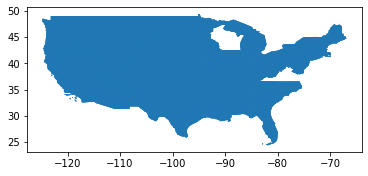

In [24]:
gdf.plot()

In [25]:
gdf.shape[0]/3

2903.0

In [26]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,399915,388053,387623,365655,367837,376622,395399,417058,419915,444182
1,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,14161,14006,13900,13688,13434,13406,13440,13414,13410,13367
2,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,28241,27706,27887,26714,27381,28094,29420,31091,31314,33230
3,01,091,00161572,01091,Marengo,Marengo County,06,H1,G4020,None,...,631357,618986,643067,658510,672442,682230,703891,713222,717118,737908
4,01,091,00161572,01091,Marengo,Marengo County,06,H1,G4020,None,...,21331,21170,20944,20649,20360,20105,19975,19757,19505,19375


In [27]:
gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'Unnamed: 0', 'GeoFIPS',
       'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification',
       'Description', 'Unit', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [28]:
years = [str(year) for year in range(1969,2018)]
dtypes = list(zip(years,[gdf[year].dtype for year in years]))


In [29]:
dtypes

[('1969', dtype('O')),
 ('1970', dtype('O')),
 ('1971', dtype('O')),
 ('1972', dtype('O')),
 ('1973', dtype('O')),
 ('1974', dtype('O')),
 ('1975', dtype('O')),
 ('1976', dtype('O')),
 ('1977', dtype('O')),
 ('1978', dtype('O')),
 ('1979', dtype('O')),
 ('1980', dtype('O')),
 ('1981', dtype('O')),
 ('1982', dtype('O')),
 ('1983', dtype('O')),
 ('1984', dtype('O')),
 ('1985', dtype('O')),
 ('1986', dtype('O')),
 ('1987', dtype('O')),
 ('1988', dtype('O')),
 ('1989', dtype('O')),
 ('1990', dtype('O')),
 ('1991', dtype('O')),
 ('1992', dtype('O')),
 ('1993', dtype('O')),
 ('1994', dtype('O')),
 ('1995', dtype('O')),
 ('1996', dtype('O')),
 ('1997', dtype('O')),
 ('1998', dtype('O')),
 ('1999', dtype('O')),
 ('2000', dtype('O')),
 ('2001', dtype('O')),
 ('2002', dtype('int64')),
 ('2003', dtype('int64')),
 ('2004', dtype('int64')),
 ('2005', dtype('int64')),
 ('2006', dtype('int64')),
 ('2007', dtype('int64')),
 ('2008', dtype('int64')),
 ('2009', dtype('int64')),
 ('2010', dtype('int64'))

## Issues

1. Virginia
2. Wisconsin
3. Object data types for 1969-2001

In [30]:
gdf.to_file('pcincome0.shp')